## Джураева Асель
## AIN-2-22

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def load_datasets():
    datasets = {
        "Digits": load_digits(),
        "Wine": load_wine(),
        "Breast Cancer": load_breast_cancer()
    }
    return datasets

datasets = load_datasets()



Визуализация данных Digits


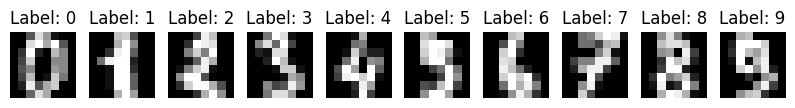


Визуализация данных Wine


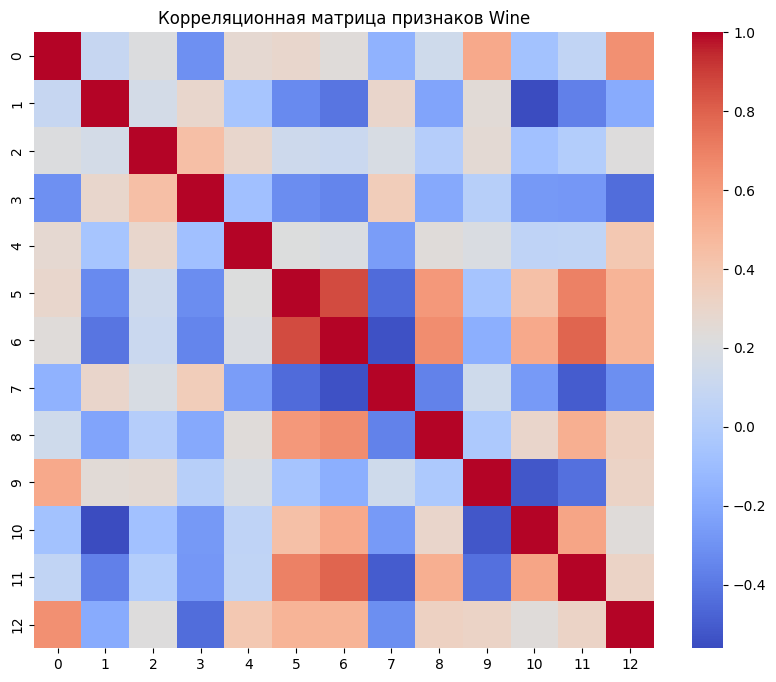


Визуализация данных Breast Cancer


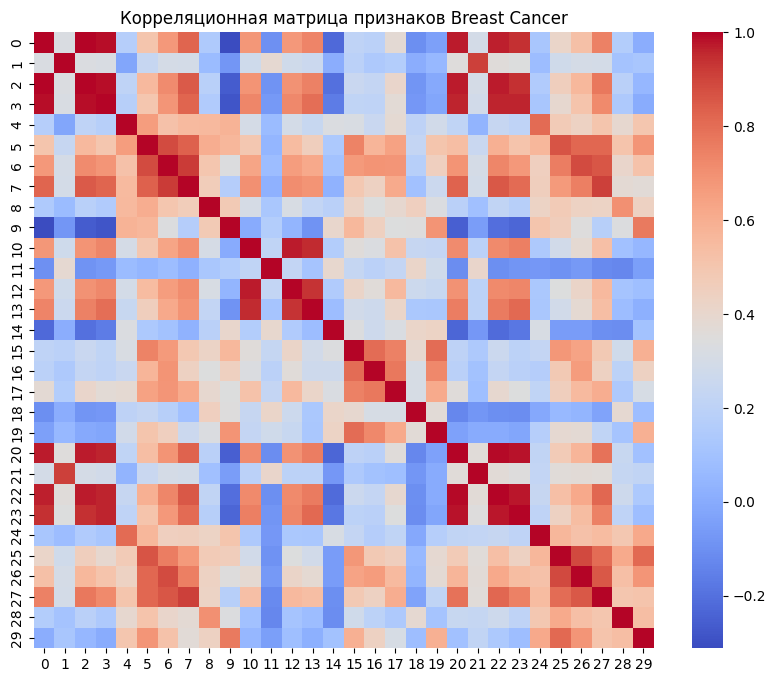

In [2]:

def visualize_data(data, name):
    if name == "Digits":
        fig, axes = plt.subplots(1, 10, figsize=(10, 3))
        for ax, img, label in zip(axes, data.data[:10], data.target[:10]):
            ax.imshow(img.reshape(8, 8), cmap='gray')
            ax.set_title(f"Label: {label}")
            ax.axis('off')
        plt.show()
    elif name in ["Wine", "Breast Cancer"]:
        plt.figure(figsize=(10, 8))
        sns.heatmap(np.corrcoef(data.data.T), cmap="coolwarm", cbar=True)
        plt.title(f"Корреляционная матрица признаков {name}")
        plt.show()


for name, data in datasets.items():
    print(f"\nВизуализация данных {name}")
    visualize_data(data, name)


In [3]:

def prepare_data(data):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

dataset_splits = {}
for name, data in datasets.items():
    dataset_splits[name] = prepare_data(data)


In [4]:

def build_knn_model(X_train, y_train, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    return model


models = {}
for name, (X_train, X_test, y_train, y_test) in dataset_splits.items():
    print(f"Построение модели для {name}")
    models[name] = build_knn_model(X_train, y_train)


Построение модели для Digits
Построение модели для Wine
Построение модели для Breast Cancer


Оценка модели для Digits

--- Оценка модели для Digits ---
Точность: 99.26%
Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



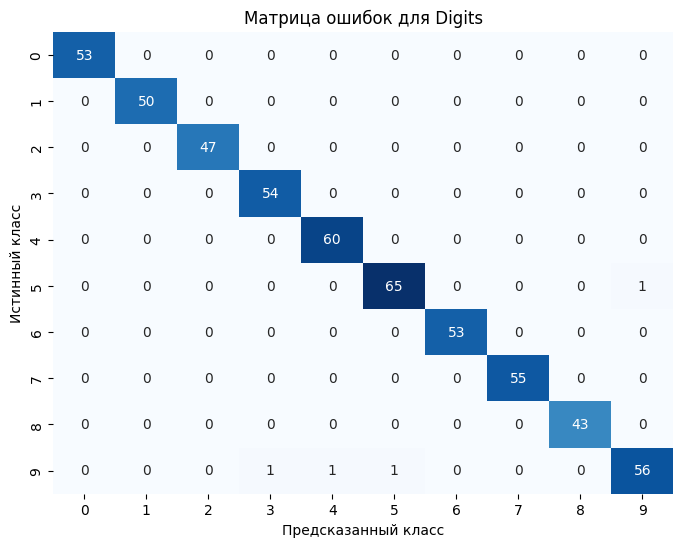

Оценка модели для Wine

--- Оценка модели для Wine ---
Точность: 74.07%
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



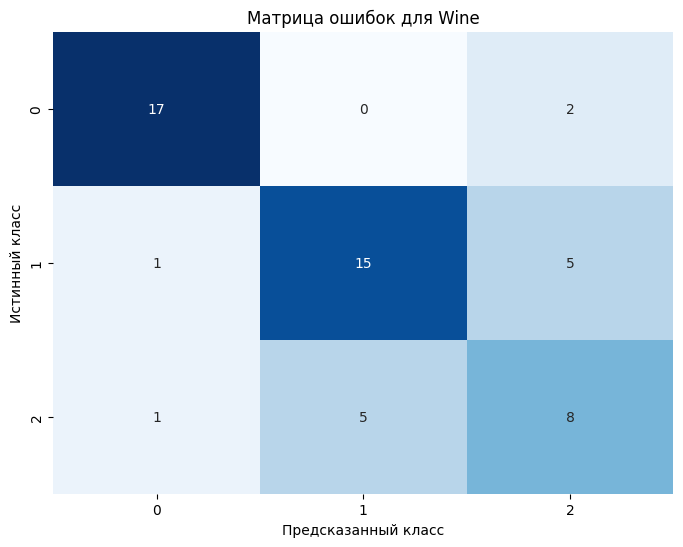

Оценка модели для Breast Cancer

--- Оценка модели для Breast Cancer ---
Точность: 95.91%
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



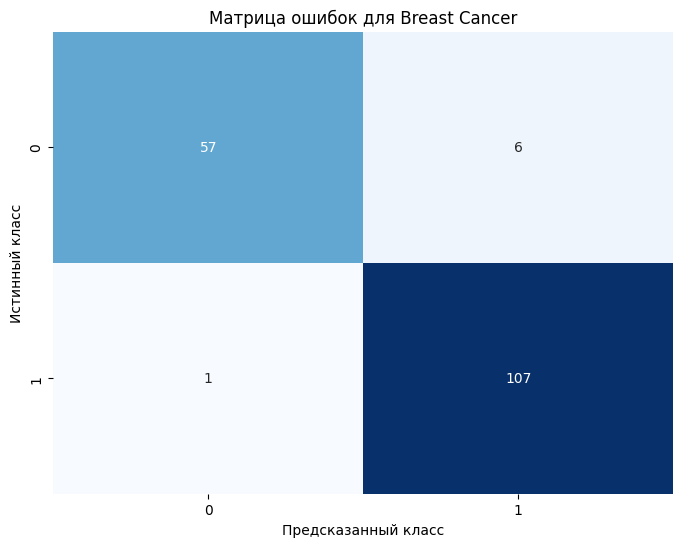

In [5]:

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n--- Оценка модели для {name} ---")
    print(f"Точность: {accuracy * 100:.2f}%")
    print("Отчет о классификации:\n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Матрица ошибок для {name}")
    plt.xlabel("Предсказанный класс")
    plt.ylabel("Истинный класс")
    plt.show()


for name, (X_train, X_test, y_train, y_test) in dataset_splits.items():
    print(f"Оценка модели для {name}")
    evaluate_model(models[name], X_test, y_test, name)
